Objective: find median birth date (when half the babies in the year have been born) and then make some graphs for fun

In [1]:
import pandas as pd
import numpy as np

# Load the datasets
birthData = pd.read_csv('US_births_2000-2014_SSA.csv').values.tolist()


In [2]:
# Tally number of births on each date from 2000-2014
birthTally = {}
for x in range(0, 5479):
    date = birthData[x][5]
    date = date.split('/')[0] + '/' + date.split('/')[1]
    if date in birthTally:
        birthTally[date] = birthTally[date] + birthData[x][4]
    else:
        birthTally[date] = birthData[x][4]

In [3]:
# functions unnecessary lol

# Total of births on given day
def totalDay(day: str) -> int:
    return birthTally[day]
# Average births on given day
def averageDay(day: str) -> int:
    return birthTally[day]/15

In [4]:
# Find total births & average births per year:
sum = 0
for day in birthTally:
    sum += totalDay(day)
average = sum/15
print("Total Births: {0} \nAverage Births per Year: {1}".format(sum, average))

Total Births: 62187024 
Average Births per Year: 4145801.6


In [37]:
# Median birthday
count = 0 # running total until we hit median
flag = False # exit if number found
numDay = 1 # day in year
for month in range(1,13):
    day = 1 # day in month
    while "{0}/{1}".format(month,day) in birthTally:
        currDate = "{0}/{1}".format(month,day)
        curr = birthTally[currDate] # curr num of births
        count += curr
        if (count >= sum/2):
            flag = True
            print("The median day in terms of birth is {0}. At this point, {1} births had occurred on average during 2000-2014.".format(currDate, count / 15))
            print("At this point, roughly {0}% of the year had passed or {1} days.".format(round(10000*numDay/365.25)/100, numDay))
            break
        day += 1
        numDay += 1
    if flag:
            break

The median day in terms of birth is 7/5. At this point, 2074540.0 births had occurred on average during 2000-2014.
At this point, roughly 51.2% of the year had passed or 187 days.


In [40]:
# create np array with all of the birth counts
daysOfYear = np.zeros(366)
countDays = 0
for month in range(1,13):
    day = 1
    while "{0}/{1}".format(month,day) in birthTally:
        currDate = "{0}/{1}".format(month,day)
        curr = birthTally[currDate]
        daysOfYear[countDays] = curr/15
        day += 1
        countDays += 1

2791.266666666667


In [30]:
print(daysOfYear[5])
print(daysOfYear[365])

10944.466666666667
10548.666666666666


Data Summary:
Min: 6437.866666666667
Max: 12734.933333333332
Mean: 11350.206010928963


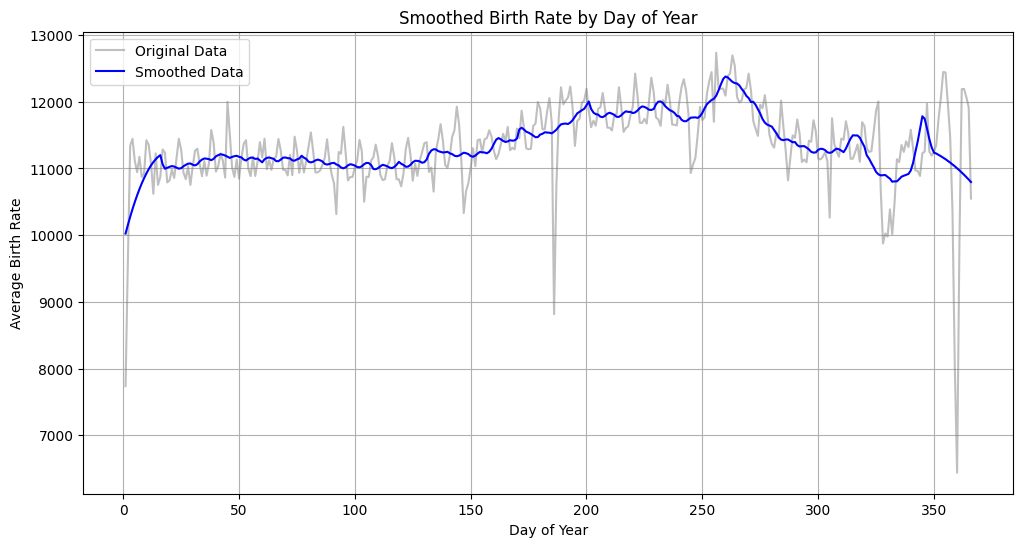

In [41]:
# correct for leap year
daysOfYear[59] = 4 * daysOfYear[59]

# consulted ChatGPT for the below part

import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Assuming daysOfYear is your data array
# Example data initialization
# daysOfYear = np.random.randint(5000, 15000, size=366)  # For illustration; replace with your actual data

# Verify the data
print("Data Summary:")
print("Min:", np.min(daysOfYear))
print("Max:", np.max(daysOfYear))
print("Mean:", np.mean(daysOfYear))

# Apply Savitzky-Golay filter for smoothing
window_length = min(31, len(daysOfYear) - 1)  # Ensure window length is valid
smoothed_data = savgol_filter(daysOfYear, window_length=window_length, polyorder=2)

# Create the x-axis as days of the year (1 through 366)
days = np.arange(1, 367)

# Plot the original and smoothed data
plt.figure(figsize=(12, 6))
plt.plot(days, daysOfYear, label='Original Data', color='gray', alpha=0.5)
plt.plot(days, smoothed_data, label='Smoothed Data', color='blue')

# Add titles and labels
plt.title('Smoothed Birth Rate by Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Average Birth Rate')
plt.legend()
plt.grid(True)
plt.show()
